In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



class EMA:
    #https://stackoverflow.com/questions/42869495/numpy-version-of-exponential-weighted-moving-average-equivalent-to-pandas-ewm
    def __init__(self, window):
        self.window = window
        alpha = 2 /(window)
        alpha_rev = 1 - alpha
        self.pows = alpha_rev**(np.arange(window))
        self.pows = np.flip(pows, 0)
        self.norm = np.sum(self.pows)
    
        self.data = np.array([])
        self.count = 0
        
    def tick(self, val):
        ret = None
        if self.count < self.window:
            self.data = np.append(self.data, val)
            self.count += 1
            if self.count == self.window:
                ret = np.sum(self.data * self.pows) / self.norm
        else:
            np.roll(self.data, -1)
            self.data[-1] = val
            ret = np.sum(self.data * self.pows) / self.norm
        return ret

In [49]:
window = 10
alpha = 2 / (window + 1)
alpha_rev = 1 - alpha
data = np.array([1,2,3,4,5,6,7,8,9,10])
n = data.shape[0]

In [50]:
e = EMA(10)
for i in range(20):
    print(e.tick(i))

None
None
None
None
None
None
None
None
None
6.053089074493298
6.263145239484086
6.473201404474873
6.68325756946566
6.893313734456447
7.103369899447234
7.313426064438021
7.523482229428808
7.733538394419596
7.943594559410383
8.153650724401171


In [23]:
pows = alpha_rev**(np.arange(n))

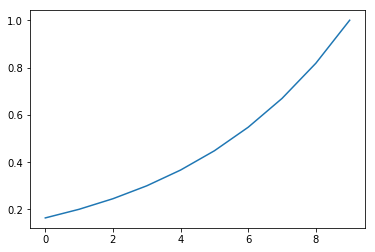

In [33]:
plt.plot(np.flip(pows, 0))

In [16]:
np.roll(data, -1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10,  1])

In [19]:
data[-1] = 10

In [20]:
np.arange(2)

array([0, 1])

In [21]:
data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
pows

array([1.        , 0.81818182, 0.66942149, 0.54770849, 0.44812513,
       0.36664783, 0.29998459, 0.24544194, 0.20081613, 0.16430411])

In [25]:
data * pows

array([1.        , 1.63636364, 2.00826446, 2.19083396, 2.24062564,
       2.19988699, 2.09989213, 1.9635355 , 1.80734517, 1.64304107])

In [29]:
np.sum(data * pows) / np.sum(pows)

3.946910925506703

In [53]:
scale_arr = 1/pows[:-1]
print(scale_arr)

[1.         1.22222222 1.49382716 1.82578875 2.23151959 2.72741283
 3.33350457 4.07428336 4.97967966]


In [ ]:
offset = data[0]*pows[1:]
pw0 = alpha*alpha_rev**(n-1)

mult = data*pw0*scale_arr
cumsums = mult.cumsum()